<a href="https://colab.research.google.com/github/aruanalucena/Projeto_Ecommerce_/blob/main/E-commerce_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/mbdq8P5.png)

# <font color='arrows'>**Quem sou eu na fila do pão!**
>Meu nome é **Aruanã Cortez**, sou Cientista de Dados. Sempre tive gosto pela área de tecnologia, tem 2 anos  comecei a aprender sobre programação, ciência de dados e etc.
* Procuro colocação em startups e companhias no exterior, principalmente na Alemanha e Holanda. Paixão por desafios e Machine Learning , IA e IoT são áreas que tenho muito interesse e me desenvolver e projetos.Tenho conhecimento de Métodos Ageis , versionamento e  trabalho remoto.

### <font color='arrows'>**Onde encontrar meu trabalho?**
1. [Site](https://www.aruanacortezdev.com.br);
2. [Github](https://https://github.com/aruanalucena) .
3. [Medium](https://medium.com/me/stories/public)
4. [Twitter](https://twitter.com/@AruanaCortez)

# <font color='grey'>**Sobre o que é meu projeto?**</font>

Neste trabalho iremos analisar a base de dados disponibilizada _**online pela Olist**_.

***

Esta base refere-se ao desenvolvimento do comércio eletrônico no Brasil nos últimos anos, apresentando informações tanto das compras realizadas, quanto dos clientes que as fizeram, dos vendedores envolvidos e dos produtos comercializado neste tempo.



***
**Alvos de estudo**:
1. <font color='green'>**NLP|Processamento Linguagem Natural**</font> Desenvolver analise dos textos de avaliação e suas diversas dimensões.
2.<font color='green'>**CLUSTERING|AGRUPAMENTO**</font> Agrupar exemplo clientes que não escreveram um comentario.Porquê? satisfeito ou  o que ?
3. <font color='green'>**SALES PREDICTION|PREVER VENDAS**</font> Com dados da data de compra prever vendas futuras.
4.<font color='green'>**PRODUCT QUALITY|QUALIDADE DO PRODUTO**</font> Categorias que causam mais insatisfação do Cliente.
5.<font color='green'>**FEATURE ENGINEERING|ENGENHARIA DE RECURSOS**</font>Anexar informações publicas a ele ou criar recusrsos a partir dos dados.
***

**Objetivos**:
Meu  objetivo é explorar esta base de dados para tirar informações relevantes para serem utilizadas nos negócios, culminando com uma segmentação dos clientes, onde estes possam ser classificados de acordo com sua assiduidade às compras online.


* **OBS :** Vou procurar aplicar todas as técnicas que recebi no Curso dos instrutores, mentores e equipe da AWARI.

# Guia para o notebook:
<font color='Orange'> >> </font> Textos precedidos de sinais na cor <font color='Orange'> **Laranja** </font> são **comentários gerais** feitos por mim. <br>
<font color='Red'> >> </font> Textos precedidos de sinais na cor <font color='Red'> **Vermelho** </font> são questionamentos que **tentarei responder**. <br>
<font color='Blue'> >> </font> Textos precedidos de sinais na cor <font color='Blue'> **Azul** </font> são **respostas e hipóteses levantadas por mim** para responder aos questionamentos anteriores.<br>
<font color='Green'> >> </font> Textos precedidos de sinais na cor <font color='Green'> **Verde** </font> Demonstro  **conceitos**.

#<font color='green'>>>Análise dos outliers</font> 

O que é um outlier?

Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva normal (o que é curva normal?). Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
[Aquarela](https://www.aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/)

##<font color='orange'>**>>1) Introdução**</font> 

Neste notebook faremos uma análise mais específica dos outliers da base de dados da Olist. Esta é uma continuação do trabalho de segmentação de clientes que pode ser visto [segmentação](https://colab.research.google.com/drive/10yah_039QDoRxf-2vYhjJv8OTPqmr2Ox#scrollTo=QcUWhfGJ0t2J)

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/outliers.csv')
df.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
0,0005e1862207bf6ccc02e4228effd9a0,548,0,1,0,135.00,0,0,Ruim
1,000fbf0473c10fc1ab6f8d2d286ce20c,39,4,4,2,285.80,1,7,Ótimo
2,0011805441c0d1b68b48002f1d005526,497,0,1,0,269.00,1,1,Ruim
3,0011857aff0e5871ce5eb429f21cdaf5,432,1,1,0,174.33,1,2,Regular
4,0028a7d8db7b0247652509358ad8d755,264,2,1,0,274.00,1,3,Regular


In [3]:
df.shape

(9541, 9)

In [4]:
df.describe()

,recency,R,frequency,F,monetary,M,score
count,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000
mean,283.694791,1.998323,1.671313,0.512944,536.772972,1.425008,3.936275
std,174.812672,1.425875,1.453804,0.890060,485.599817,0.738404,1.980599
min,1.000000,0.000000,1.000000,0.000000,0.850000,0.000000,0.000000
25%,131.000000,1.000000,1.000000,0.000000,279.900000,1.000000,2.000000
50%,273.000000,2.000000,1.000000,0.000000,395.000000,1.000000,4.000000
75%,426.000000,3.000000,2.000000,1.000000,634.400000,2.000000,5.000000
max,729.000000,4.000000,24.000000,4.000000,13440.000000,4.000000,12.000000


## <font color='orange'>**2) Exibindo os dados graficamente**

- Pairplot

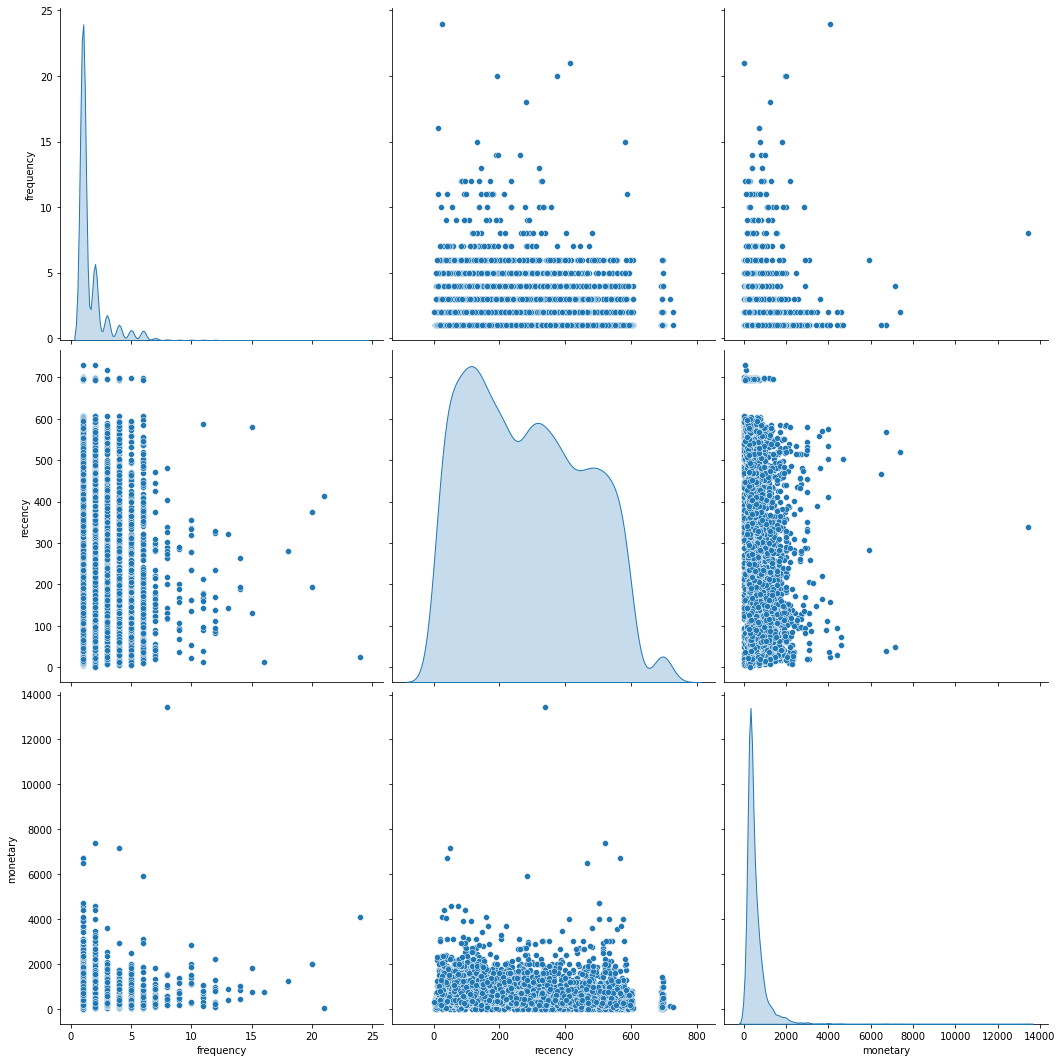

In [5]:
# Plotando um pairplot
colunas = df[['frequency', 'recency', 'monetary']]
sns.pairplot(data=colunas, diag_kind='kde',height=5)
plt.show()

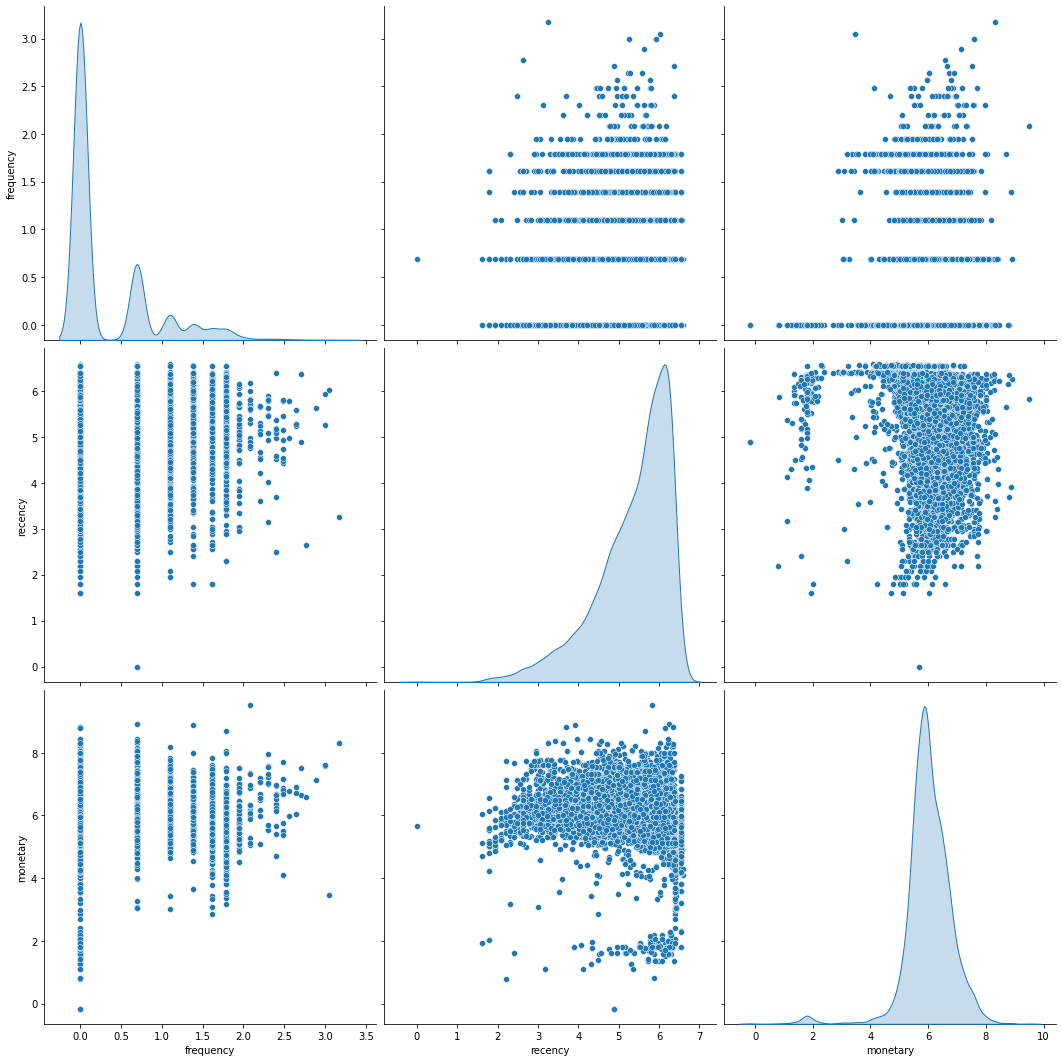

In [6]:
# Plotando um pairplot em escala logarítmica
colunas = df[['frequency', 'recency', 'monetary']]
sns.pairplot(data=np.log(colunas), diag_kind='kde',height=5)
plt.show()

- Heatmap

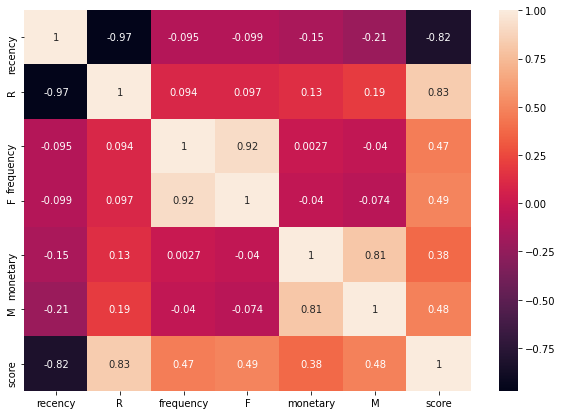

In [7]:
# Verificando a correlação das varáveis
fig = plt.figure(figsize=(10,7))
correlacao = df.corr()
sns.heatmap(data=correlacao, annot=True)
plt.show()

- Boxplot

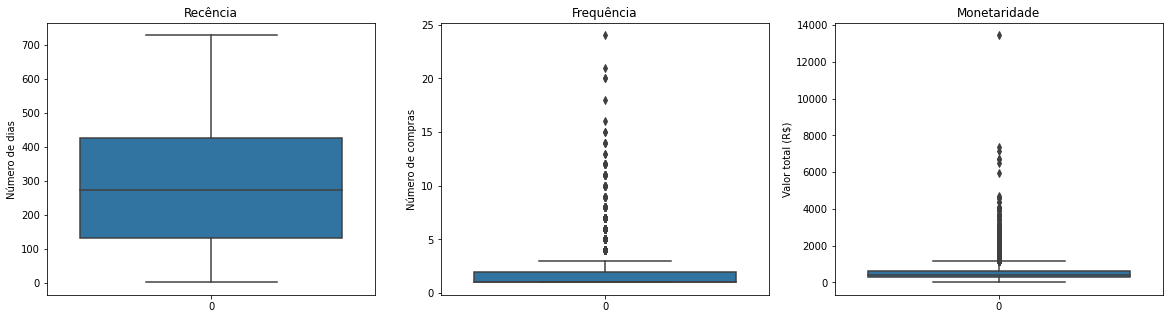

In [8]:
# Plotando um boxplot para as variáveis de interesse
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df['recency'])
plt.title('Recência')
plt.ylabel('Número de dias')
plt.subplot(1,3,2)
sns.boxplot(data=df['frequency'])
plt.title('Frequência')
plt.ylabel('Número de compras')
plt.subplot(1,3,3)
sns.boxplot(data=df['monetary'])
plt.title('Monetaridade')
plt.ylabel('Valor total (R$)')
plt.show()

*  <font color='red'>**Analisando o boxplot vemos que a recência não apresenta outliers, logo nossa análise ficará mais focada na frequência e na monetaridade. <br>Tendo em vista que a melhor situação possível ocorre quando temos grandes frequência e monetaridade, podemos procurar aqueles clientes "ideais", ou seja, aqueles que compram muitas vezes e gastam muito.**

Dos resultados acima, buscaremos encontrar aqueles clientes considerados ideais.

- Considerando a frequencia

<font color='blue'>**Considerando o boxplot, podemos ver que os outliers são os pontos acima do valor máximo e agora podemos calcular este valor máximo para selecionar estes clientes fazendo uma simples query no nosso dataframe.**

In [9]:
# Cálculo do valor máximo
coluna = df['frequency']
Q1, Q3 = coluna.quantile(q=[.25, .75])
V_max = Q3 + 1.5 * (Q3 - Q1)

In [10]:
# Criação do dataframe para frequência
df_freq = df.query(f'frequency > {V_max}')
df_freq.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
1,000fbf0473c10fc1ab6f8d2d286ce20c,39,4,4,2,285.80,1,7,Ótimo
18,0064a1b5f5cddd047c987b988a90c8c1,186,3,4,2,215.60,1,6,Ótimo
26,0096c18412349537abc45e350581cbbc,538,0,4,2,679.60,2,4,Bom
27,0097fca0db567f5ca79509b7b4fc1c2d,137,3,7,3,172.14,1,7,Ótimo
30,00ae50eb5e1d2514f694dee1dcbbd5ae,116,3,5,3,213.50,1,7,Ótimo


In [11]:
df_freq.shape

(848, 9)

- Considerando a monetaridade

Analogicamente ao caso anterior, podemos selecionar os outliers levando em consideração a coluna de monetaridade segundo a seguinte query.

In [12]:
# Cálculo do valor máximo
coluna = df['monetary']
Q1, Q3 = coluna.quantile(q=[.25, .75])
V_max = Q3 + 1.5 * (Q3 - Q1)

In [13]:
# Criação do dataframe para monetaridade
df_mon = df.query(f'monetary > {V_max}')
df_mon.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
15,005226be8d5b972d0f72b4e8a79f322b,155,3,1,0,1561.0,3,6,Ótimo
29,00adeda9b742746c0c66e10d00ea1b74,300,2,2,1,2078.5,3,6,Ótimo
33,00c07da5ba0e07b4f248a3a373b07476,38,4,1,0,2258.0,3,7,Ótimo
41,011875f0176909c5cf0b14a9138bb691,534,0,1,0,3999.9,4,4,Bom
46,0129d48dce554d95f641d01eaa88904a,172,3,1,0,1390.0,3,6,Ótimo


In [14]:
df_mon.shape

(702, 9)

<font color='blue'>**Podemos agora pegar os clientes que estão nos dois dataframes, ou seja, aqueles clientes com alto número de compras com altos valores gastos. Para isso, criaremos dois conjuntos (um para cada variável) contendo os índices dos clientes e pegaremos a interseção desses grupos.**

In [15]:
# Criação dos conjuntos com os índices dos clientes
outliers_freq = set(df_freq.index)
outliers_mon = set(df_mon.index)

In [16]:
clientes = outliers_freq.intersection(outliers_mon)
print(f'Temos então {len(clientes)} clientes nestas condições.')

Temos então 55 clientes nestas condições.


<font color='red'>**Ou seja, ao todo temos 55 clientes que compraram muitas vezes e gastaram também muito dinheiro, comportamento adequado para aqueles clientes considerados ideais.**</font><br> Este tipo de cliente precisa de um estudo mais profundo para entendermos se tratam-se de outliers, de alguma tentativa de fraude ou se realmente são clientes assíduos pelas compras online. Para isso podemos criar um novo dataframe com estes clientes e estudá-lo fazendo uma filtragem segundo os seguintes passos:

1) Encontrar a média das frequências;

2) Encontrar a média da monetaridade;

3) Classificar os clientes de acordo com o critério:

- Acima da média em ambas as medidas: ***cliente ideal***
- Acima da média em uma medida e abaixo da média na outra um possível outlier ou ainda um possível caso de fraude. 

In [17]:
# Criação do dataframe clientes_top
clientes_top = df.iloc[list(clientes),:].sort_index(ascending=True)
clientes_top.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
116,0341bbd5c969923a0f801b9e2d10a7b8,96,4,6,3,1828.44,3,10,Ótimo
386,0a0a92112bd4c708ca5fde585afaa872,339,1,8,3,13440.00,4,8,Ótimo
573,0f5ac8d5c31de21d2f25e24be15bbffb,280,2,18,4,1252.35,3,9,Ótimo
675,12138e8ba93973c9b561253683f5581b,90,4,7,3,1330.00,3,10,Ótimo
1024,1b76903617af13189607a36b0469f6f3,104,4,6,3,3099.75,4,11,Ótimo


In [24]:
clientes_top.shape

(55, 9)

In [25]:
# Valor médio da frequência
media_f = clientes_top['frequency'].mean()

# Valor médio da monetaridade
media_m = clientes_top['monetary'].mean()

print(f'Valor médio da frequência: {media_f} \nValor médio da monetaridade: {media_m}')

Valor médio da frequência: 7.236363636363636 
Valor médio da monetaridade: 2129.6076363636357


<font color='blue'>**Feito isso, faremos uma seleção dos clientes segundo os critérios estabelecidos acima.**

- Clientes ideais

In [26]:
clientes_ideais = clientes_top.query(f'frequency > {media_f} & monetary > {media_m}')
clientes_ideais.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
386,0a0a92112bd4c708ca5fde585afaa872,339,1,8,3,13440.0,4,8,Ótimo
5009,86df00dc5fd68f4dd5d5945ca19f3ed6,325,2,12,4,2200.0,3,9,Ótimo
7473,c8460e4251689ba205045f3ea17884a1,26,4,24,4,4080.0,4,12,Ótimo
8948,ef8d54b3797ea4db1d63f0ced6a906e9,137,3,10,4,2849.9,4,11,Ótimo


In [27]:
clientes_ideais.shape

(4, 9)

- Outliers

1) Frequência acima da média e monetaridade abaixo da média 

In [29]:
freq_acima_media = clientes_top.query(f'frequency > {media_f} & monetary < {media_m}')
freq_acima_media.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
573,0f5ac8d5c31de21d2f25e24be15bbffb,280,2,18,4,1252.35,3,9,Ótimo
1122,1da09dd64e235e7c2f29a4faff33535c,235,2,10,4,1980.28,3,9,Ótimo
1193,1f98d2384ff7a372e6a2d3bb75cbcd54,95,4,9,4,1170.00,3,11,Ótimo
1225,20a5257c01689ac69410a14cb51bb447,356,1,10,4,1379.00,3,8,Ótimo
2268,3d47f4368ccc8e1bb4c4a12dbda7111b,336,1,10,4,1879.90,3,8,Ótimo


In [30]:
freq_acima_media.shape

(13, 9)

2) Frequência abaixo da média e monetaridade acima da média

In [31]:
monet_acima_media = clientes_top.query(f'frequency < {media_f} & monetary > {media_m}')
monet_acima_media.head()

,customer_unique_id,recency,R,frequency,F,monetary,M,score,RFM_level
1024,1b76903617af13189607a36b0469f6f3,104,4,6,3,3099.75,4,11,Ótimo
2375,4007669dec559734d6f53e029e360987,283,2,6,3,5934.60,4,9,Ótimo
4387,763c8b1c9c68a0229c42c9fc6f662b93,50,4,4,2,7160.00,4,10,Ótimo
5558,94c1c602b16a9fdfbc154ef63cfa50f9,515,0,5,3,2492.50,3,6,Ótimo
6482,adfa1cab2b2c8706db21bb13c0a1beb1,94,4,6,3,2919.40,4,11,Ótimo


In [32]:
monet_acima_media.shape

(6, 9)

## <font color='arrow'>**4) Conclusão**

Após a análise apresentada concluimos que há alguns clientes que podem ser considerados os ideais pela empresa **(dispostos no dataframe clientes_ideais)**. Teoricamente este grupo contém os clientes mais dispostos a gastar e comprar virtualmente, entretanto ainda é valido o estudo de cada um separadamente para confirmar que de fato não se trata de uma anomalia ou tentativa de fraude.

Por outro lado temos ainda os clientes que tem comportamentos opostos para frequência e monetaridade o que pode representar uma probabilidade maior de ser um outlier ou uma fraude. Estes grupos **(dispostos nos dataframes freq_acima_media e monet_acima_media)** necessitam de um estudo ainda mais profundo para confirmar ou não suas condições. O fato é que se há alguma discrepância dos clientes ou uma tentativa de fraudar o sistema estes 55 clientes devem ser o ponto de partida para esta investigação pois são os dados que mais se destacam neste sentido.

O objetivo é poder demonstrar minha capacidade analitica e visão dos dados e insights.